In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from os import listdir
from os.path import isfile, join

plt.rcParams['text.usetex'] = True
params = {
    "backend": "ps",
    "axes.labelsize": 20,
    "font.size": 20,
    "legend.fontsize": 16,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Computer Modern Roman",
    "legend.frameon": True,
    "savefig.dpi": 100,
    "axes.linewidth": 1.5,
    'xtick.major.size' : 10,
    'xtick.major.width': 1,
    'xtick.minor.size': 7,
    'xtick.minor.width': 1,
    'ytick.major.size' : 10,
    'ytick.major.width': 1,
    'ytick.minor.size': 7,
    'ytick.minor.width': 1,
    'axes.xmargin' : 0,
    'axes.ymargin' : 0,
}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')


In [16]:
############## Select device ################

device = 'transmon' # change here to change the device: charge_qubit, flopping_spin, flopping_charge, transmon, fluxonium

#############################################

data = np.load('../../data/params/'+device+'.npz', allow_pickle=True)
wq, g, kappa, dim = data['wq'], data['g'], data['kappa'], data['dim']

In [17]:
###### List available file to be plotted ########

path = '../../data/'+device+'/floquet_spectrum/'

for file in os.listdir(path):
    if file.endswith(".npz"):
        print(file)

#################################################

w_r=0.77_N_rep=30_n_states=25_dim=110.npz
w_r=0.77_N_rep=30_n_states=30_dim=110.npz
w_r=0.77_N_rep=20_n_states=25_dim=110.npz
w_r=0.77_N_rep=25_n_states=25_dim=110.npz
w_r=0.77_N_rep=20_n_states=30_dim=110.npz
w_r=0.77_N_rep=25_n_states=20_dim=110.npz
w_r=0.77_N_rep=20_n_states=20_dim=110.npz
w_r=0.77_N_rep=30_n_states=20_dim=110.npz
w_r=0.77_N_rep=25_n_states=30_dim=110.npz


In [18]:
############# Select one set of parameters ################

w_r = 0.77*wq # 0.77, 1.14

n_states_list = [20,25,30]
N_rep_list = [20,25,30]

dim = 110

###########################################################

In [19]:
def import_npz(npz_file):
    Data = np.load(npz_file, allow_pickle=True)
    for varName in Data:
        globals()[varName] = Data[varName]

(-0.9, -0.3)

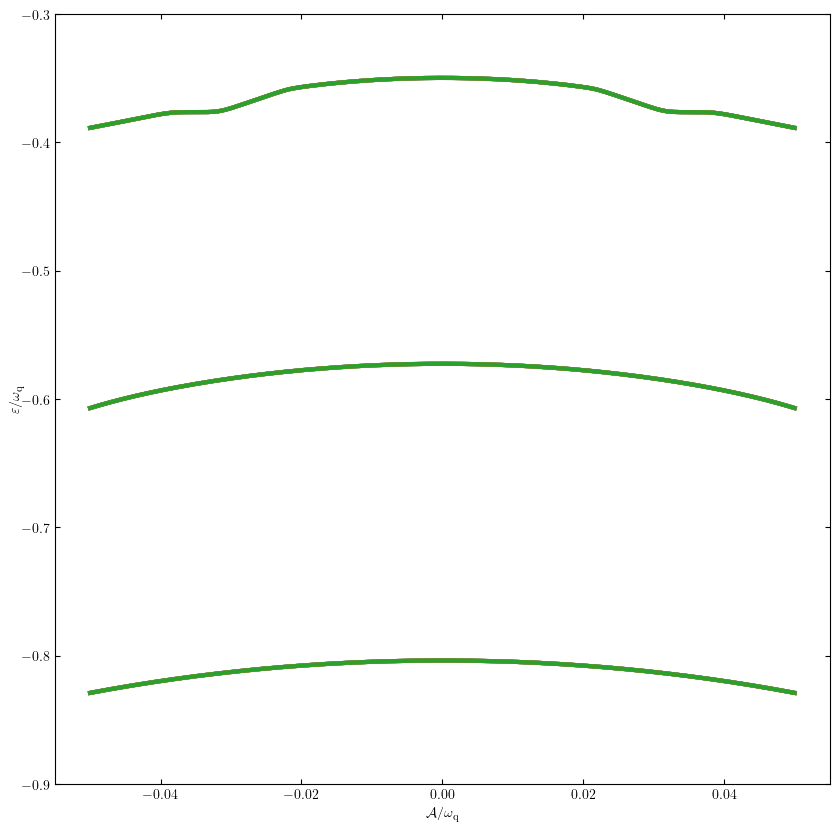

In [20]:
%matplotlib inline

fig, ax_replica = plt.subplots(figsize=(10,10), dpi=100)

cmap = mpl.colormaps["tab10"]

for i, idx in enumerate(n_states_list):
    for j, N_rep in enumerate(N_rep_list):
        fname = path+'w_r='+str(np.round(w_r/wq,3))\
            +'_N_rep='+str(N_rep)+'_n_states='+str(n_states_list[i])+'_dim='+str(dim)

        import_npz(fname+'.npz')

        for n in range(np.shape(evals_list[0])[1]):
            ax_replica.plot(A_list_replica, evals_list[0][:,n], c=cmap.colors[j], lw=3, alpha=(i+1)/(len(n_states_list)))
            #if device == 'transmon':
                #ax_replica.plot(A_list_replica, evals_analytical[:,n], c='tab:green')

ax_replica.xaxis.set_tick_params(direction="in", which='both')
ax_replica.yaxis.set_tick_params(direction="in", which='both')
ax_replica.tick_params(top=True, bottom=True, left=True, right=True, labelleft=True,
                  labelbottom=True, labelright=False, labeltop=False, which='both')

ax_replica.set_xlabel(r'$\mathcal A$')
ax_replica.set_ylabel(r'$\varepsilon$', labelpad=-2)

ax_replica.set_ylim([-0.9,-0.3])